In [6]:
#hide
from fastbook import *
from fastai import *

In [7]:
!ls

chest_xray_data  datasets  export.pkl  storage	x-rax-dep-learning.ipynb


In [9]:
Path.BASE_PATH = Path('./chest_xray_data/')
path = Path.BASE_PATH
Path.BASE_PATH.ls()


(#3) [Path('.DS_Store'),Path('normal'),Path('pneumonia')]

In [10]:
fns = get_image_files(path)
fns

(#5856) [Path('normal/IM-0001-0001.jpeg'),Path('normal/IM-0003-0001.jpeg'),Path('normal/IM-0005-0001.jpeg'),Path('normal/IM-0006-0001.jpeg'),Path('normal/IM-0007-0001.jpeg'),Path('normal/IM-0009-0001.jpeg'),Path('normal/IM-0010-0001.jpeg'),Path('normal/IM-0011-0001-0001.jpeg'),Path('normal/IM-0011-0001-0002.jpeg'),Path('normal/IM-0011-0001.jpeg')...]

In [11]:
verify_images(fns)

(#0) []

In [12]:
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)



In [14]:
dls = xrays.dataloaders(path)
dls.bs

64

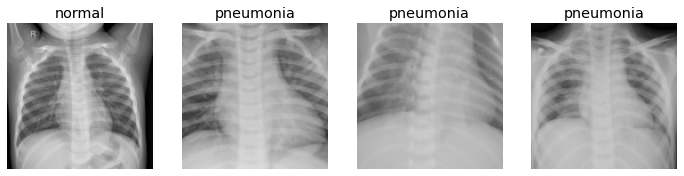

In [15]:
dls.valid.show_batch(max_n=4, nrows=1)

In [26]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.551447,0.254062,0.072588,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.234617,0.143732,0.040991,00:20
1,0.141492,0.110148,0.026473,00:19
2,0.094363,0.093750,0.028181,00:19


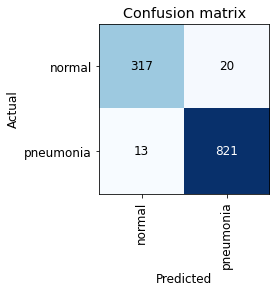

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

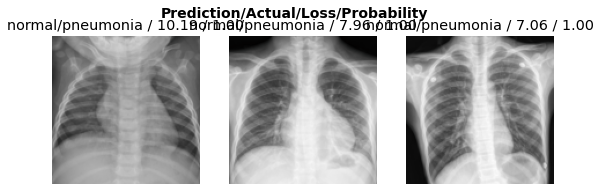

In [30]:
interp.plot_top_losses(3, nrows=1)

In [31]:
learn.export()

In [33]:
learn_inf = load_learner("./export.pkl")

In [44]:
from ipywidgets import VBox
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description="Classify")

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    
    #get predictions
    pred, pred_idx, probs = learn.predict(img)

    
    lbl_pred.value = f"Predictions: {pred}; Probability: {probs[pred_idx]:.04f}"
    lbl_pred
    
btn_run.on_click(on_click_classify)
VBox([widgets.Label("Select Image"), btn_upload, btn_run, out_pl, lbl_pred])